# 1. Import Python Packages

In [1]:
%matplotlib notebook
import sys, os
sys.path.insert(0,'/global/homes/b/bpb/metatlas')

sys.path.insert(1,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

from metatlas.helpers import dill2plots as dp
from metatlas.helpers import metatlas_get_data_helper_fun as ma_data
from metatlas.helpers import rt_corrector as rt_corrector
from metatlas.helpers import chromatograms_mp_plots as cp
import metatlas.metatlas_objects as metob
from metatlas.helpers import mzmine_helpers as mzm

import qgrid

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import time
import dill
import numpy as np
import multiprocessing as mp
import pandas as pd

import matplotlib.pyplot as plot

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)

/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
482.0797-1.007276


481.072424

In [4]:
cpds = metob.retrieve('Compounds',mono_isotopic_molecular_weight = '481.07%')

In [6]:
for c in cpds:
    print c.name,(c.mono_isotopic_molecular_weight-481.072424)/481*1e6

3-benzoyloxypropyl-glucosinolate -2.43543451148
6-(Methylsulfonyl)hexyl glucosinolate 4.57314760916


# 2. Register LCMS Runs into categorical groups.

* ### Select MetAtlas LCMS Runs by experiment and filename.  

In [2]:
f = dp.interact_get_metatlas_files()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


* ### Create a "File-Info" sheet from the selected files.  
This sheet needs to be downloaded and filled in.  The "File-Info" sheet is the exchange format we use to define the grouping membership for LCMS runs.


In [ ]:
dp.make_empty_fileinfo_sheet('/global/homes/b/bpb/Downloads/empty_finfo_20170130_SK-JG.tab',f.files)

* ### Create metatlas groups from filled in file-info sheet
Defining groups of files allows for the selection of sets of LCMS runs by specifying the group names.  In addition,  the group membership is preserved in the exported metatlas datasets; so the application of statistical methods based on grouped data is straightforward.

Your filled in sheet will look something like this:
<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>mzml_file</th><th>group</th><th>description</th></tr></thead><tbody>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_10_Run413.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_1</td><td>&nbsp;</td></tr>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_11_Run415.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_1</td><td>&nbsp;</td></tr>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_12_Run417.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_1</td><td>&nbsp;</td></tr>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_1_Run395.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_2</td><td>&nbsp;</td></tr>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_2_Run397.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_2</td><td>&nbsp;</td></tr>
 <tr><td>.../20160531_KBL_violacein_cells_384_final/20160531_C18_ACN_POS_MSMS_KBL_Qex_A_3_Run399.mzML</td><td>20160531_KBL_C18_Vio_cells_384_Quad_2</td><td></td></tr>
</tbody></table>

A text description of each group is an optional field.  These can be a few, short sentences that describe each group.

In [ ]:
g = dp.make_groups_from_fileinfo_sheet('/global/homes/b/bpb/Downloads/20170130_Groups_JG.txt',
                                       filetype='tab',
                                       store=True)

View the list of metatlas objects using "to_dataframe"

In [ ]:
metob.to_dataframe(g).head()

# 3. Create a new Atlas
* ### From Google Doc Reference Data

In [ ]:
# dp = reload(dp)
# atlas_sheet = dp.get_formatted_atlas_from_google_sheet(polarity='POS',
#                                           method='QE119_ZIC-HILIC',
#                                           mz_tolerance=10)

In [ ]:
# atlas_sheet.head()

* ### From a pandas dataframe

In [ ]:
#
# dp = reload(dp)
# names = dp.make_atlas_from_spreadsheet('',
#                                        '20161114_JGIQE_C18_ISTD_POS',
#                                        filetype='dataframe',
#                                        sheetname='',
#                                        polarity = 'positive',
#                                        store=True,
#                                        dataframe = atlas_df,
#                                       mz_tolerance = 10)

* ### From a spreadsheet
This is by far the most common way to create a new Atlas in Metabolite Atlas.  The columns the sheet must be exactly as what is seen here.  In cases where there isn't a compound in the database, the "label" field below is used.  Here is an example of what a sheet could look like.

<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>label</th><th>rt_min</th><th>rt_max</th><th>rt_peak</th><th>mz</th><th>mz_tolerance</th><th>inchi_key</th></tr></thead><tbody>
 <tr><td>violacein </td><td>4.2</td><td>4.4</td><td>4.3</td><td>344.1036913</td><td>5</td><td>XAPNKXIRQFHCHN-QGOAFFKASA-N</td></tr>
 <tr><td>deoxyviolacein (iso1 - main)</td><td>4.75</td><td>4.9</td><td>4.8</td><td>328.1087767</td><td>5</td><td>OJUJNNKCVPCATE-QGOAFFKASA-N</td></tr>
 <tr><td>tryptophan</td><td>2.3</td><td>2.45</td><td>2.36</td><td>205.0978776</td><td>5</td><td>QIVBCDIJIAJPQS-VIFPVBQESA-N</td></tr>
 <tr><td>deoxychromoviridans</td><td>5.4</td><td>6</td><td>5.75</td><td>605.244821</td><td>5</td><td>&nbsp;</td></tr>
 <tr><td>chromoviridans</td><td>5.15</td><td>5.5</td><td>5.3</td><td>621.239736</td><td>5</td><td>&nbsp;</td></tr>
 <tr><td>ABMBA</td><td>4.72</td><td>4.88</td><td>4.8</td><td>229.9811</td><td>5</td><td>LCMZECCEEOQWLQ-UHFFFAOYSA-N</td></tr>
</tbody></table>

These tables can be csv or tab delimited text or excel spreadsheets.

There is a <a href = 'https://drive.google.com/open?id=0BweRoDuGcsLBNkYtQUpjQ0ktZDg'> lookup table here </a> of all compounds to get the inchi_key.

For old MetAtlas atlases, you can use Excel's "vlookup" function along with <a href = 'https://drive.google.com/open?id=0BweRoDuGcsLBQUxrRjgtbjhnSDg'> this lookup table </a> to map the old names to valid inchi keys.

```
=VLOOKUP(H2,$A:$B,2,0) where $A:$B are columns containing name and inchi-key
```

This is a <a href = 'https://drive.google.com/open?id=0BweRoDuGcsLBaThjcEZuSjh2dXM'> link </a> to all the old compound identifications that were in the database prior to the refactoring in Mid June, 2016.


In [ ]:
myAtlas.name

In [ ]:
dp = reload(dp)
names = dp.make_atlas_from_spreadsheet('/global/homes/b/bpb/Downloads/ema_neg_hilic_atlas_for_users_50447.csv',
                                       'ema_neg_hilic_50447_200A_3p5_um_20170224',
                                       filetype='csv',
                                       sheetname='',
                                       polarity = 'negative',
                                       store=True,
                                      mz_tolerance = 20)

#Workaround if your atlas is so big that you can't store/retrieve it
myAtlas = names
#atlas_df = ma_data.make_atlas_df(myAtlas)
#print myAtlas.name
#print myAtlas.username

# 0 73 2016019_metalas_KZ_Ave_uptake_qxqct_hilic_updated_pos_V2 2016-07-26 17:31:26
# 1 69 201500826_KZ_Ave_library_qxqct_hilic_pos_V2 2016-07-26 18:17:32
# 2 93 201500826_KZ_Ave_library_qxqct_hilic_neg_V2 2016-07-26 18:14:40
# 3 106 2016019_metatlas_KZ_Ave_uptake_qxqct_hilic_updated_neg_V2 2016-07-26 18:02:34
        

In [ ]:
metob.store([myAtlas])

In [ ]:
myAtlas.name

* ### Use interactive interface to build atlas from spreadsheet

In [ ]:
###### CURRENTLY UNDER DEVELOPMENT/TESTING #######
# %system cat /project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/IPython/html.py
# /html/static/style/ipython.min.css
# .widget-hlabel{min-width:10ex;padding-right:8px;padding-top:3px;text-align:right;vertical-align:text-top}
from IPython.display import HTML, display
display(HTML('''<style>
    .widget-label { min-width: 20ex !important; }
</style>'''))
dp = reload(dp)
names = interact(dp.make_atlas_from_spreadsheet,__manual=True,)
##################################################

# 4. Select groups of files to operate on

In [3]:
dp = reload(dp)
# group_names_to_remove = pd.read_csv('/global/homes/b/bpb/Downloads/pks_files_to_remove.csv')['group'].tolist()

groups = dp.select_groups_for_analysis(name = '20160413%POS%GBS%Set1',
                                       most_recent = True,
                                       remove_empty = True,#'Strain=SB214'
                                       include_list = [], exclude_list = ['4O','32'])#['QC','Blank'])


3
(0, u'20160413_Bhedlund_pHILIC_POS_GBS_Med_Ctrl_Set1', datetime.datetime(2016, 4, 14, 17, 59, 38))
(1, u'20160413_Bhedlund_pHILIC_POS_JAD2_GBS_Set1', datetime.datetime(2016, 4, 14, 17, 59, 26))
(2, u'20160413_Bhedlund_pHILIC_POS_GBS_Med_inc_Set1', datetime.datetime(2016, 4, 14, 17, 59, 22))


# 5. Select Atlas to use
* ### Select by Atlas name

In [5]:
#default ema atlas: EMA_pos%50447%
atlases = metob.retrieve('Atlas',name='ema_pos_hilic_50447_200A_3p5_um_20170224',username='bpb')
# atlases = metob.retrieve('Atlas',name='SK-ZZ-MAIZE-HILIC-NEG-EMA50447',username='*')
names = []
for i,a in enumerate(atlases):
    print(i,a.name,pd.to_datetime(a.last_modified,unit='s'))#len(a.compound_identifications)


(0, u'ema_pos_hilic_50447_200A_3p5_um_20170224', Timestamp('2017-02-25 00:33:38'))
(1, u'ema_pos_hilic_50447_200A_3p5_um_20170224', Timestamp('2017-02-25 01:02:54'))


In [ ]:
print atlases[0].compound_identifications[3].name
atlases[0].compound_identifications[3].rt_references[0].rt_peak

### Alternative way to get atlas

In [14]:
atlases = dp.get_metatlas_atlas(name='SK-ZZ-MAIZE-HILIC-POS-EMA50447',do_print = True,most_recent=True)
#201500826_KZ_Ave_library_qxqct_hilic_pos_V2
#20161007_MP3umZHILIC_V12_NEG_MetIDJamboree
# 20161104_POS_ZHILIC3um_SmallAtlas_KBL_V1
# 20161114_JGIQE_C18_ISTD_POS

(0, 114, u'SK-ZZ-MAIZE-HILIC-POS-EMA50447', datetime.datetime(2017, 3, 2, 23, 40, 5))


* ### A list of atlases is returned by the cell above.  

* You must run the following cell to specify which Atlas you want to continue your analysis with (Even if only a single atlas is returned).

* Make a dataframe from your atlas.  Required for the new, faster data slicer

In [6]:
myAtlas = atlases[1]
atlas_df = ma_data.make_atlas_df(myAtlas)
print myAtlas.name
print myAtlas.username

ema_pos_hilic_50447_200A_3p5_um_20170224
bpb


### Change the atlases name

In [ ]:
myAtlas.name = 'SK-ZZ-MAIZE-HILIC-NEG-EMA50447'

### Adjust RT using y = m x + b approach

In [ ]:
m = 0.99
b = 0.346
extra_rt = 0.2
for i,cpd_id in enumerate(myAtlas.compound_identifications):
    rt_min = myAtlas.compound_identifications[i].rt_references[0].rt_min
    rt_max = myAtlas.compound_identifications[i].rt_references[0].rt_max
    rt_peak = myAtlas.compound_identifications[i].rt_references[0].rt_peak
    myAtlas.compound_identifications[i].rt_references[0].rt_min = m * rt_min + b - extra_rt
    myAtlas.compound_identifications[i].rt_references[0].rt_peak = m * rt_peak + b
    myAtlas.compound_identifications[i].rt_references[0].rt_max = m * rt_max + b + extra_rt

### Store the updated Atlas

In [ ]:
metob.store([myAtlas])

### Take a look at the selected atlas

### View only the first few lines
* Remove the ".head()" to show the whole thing
* Put a number in the ".head()" to show number of rows
* Edit set_option to configure display:
* More options available here:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html

### View the atlas as a qgrid widget (good for widescreen displays)

In [ ]:
compound_grid = qgrid.QGridWidget(df=atlas_df)#,set_grid_option={'show_toolbar',True})
compound_grid.export()

### View the atlas as a pandas dataframe (tweak the pandas display options to fit)
* More options available here:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
atlas_df.head(8000)

# 6. Get Data

### Much faster data getting script

In [7]:
all_files = []
for my_group in groups:
    for my_file in my_group.items:
        all_files.append((my_file,my_group,atlas_df,myAtlas))
        
pool = mp.Pool(processes=min(60, len(all_files)))
# from metatlas.helpers.metatlas_get_data_helper_fun import get_data_for_atlas_df_and_file
t0 = time.time()
metatlas_dataset = pool.map(ma_data.get_data_for_atlas_df_and_file, all_files)
pool.close()
pool.terminate()
#If you're code crashes here, make sure to terminate any processes left open.
print time.time() - t0


13.6310269833


# 7a. Adjust Retention Times.  

In [ ]:
atlas_df.shape

<IPython.core.display.Javascript object>


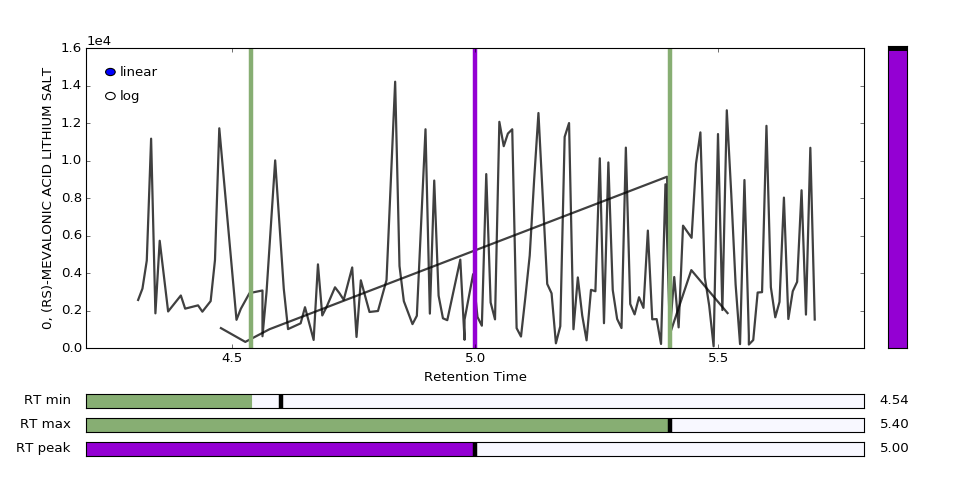

('loaded file for username = ', u'bpb')


In [8]:
dp = reload(dp)
%matplotlib notebook
a = dp.adjust_rt_for_selected_compound(metatlas_dataset,compound_idx=0,include_lcmsruns = [],alpha=0.75)

# 7b. Adjust m/z bounds

In [ ]:
# a = dp.adjust_mz_for_selected_compound(metatlas_dataset)

In [ ]:
# # dp = reload(dp)
# data,compound_grid = dp.show_compound_grid(input_dataset = metatlas_dataset)#,input_fname = '/global/homes/b/bpb/Downloads/20160531_KBL_C18_Vio_cells_384_Q_1_to_4.pkl')

# 8. Make Supplementary Tables


### Specify a directory to put all the figures into

In [ ]:
output_dir = '/global/homes/b/bpb/Downloads/SK_ZZ_MAIZE_HILIC_POS_20170302/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

* ### Export Atlas to a Spreadsheet

In [ ]:
atlas_identifications = dp.export_atlas_to_spreadsheet(myAtlas,os.path.join(output_dir,'atlas_export.csv'))

* ### Dataframes and spreadsheets

In [ ]:
dp = reload(dp)
# atlas_identifications = dp.export_atlas_to_spreadsheet(myAtlas,'%s/sheets/%s.csv'%(plot_location_label,myAtlas.name))
peak_height = dp.make_output_dataframe(input_fname = '',input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='peak_height' , output_loc=os.path.join(output_dir,'sheets'))
peak_area = dp.make_output_dataframe(input_fname = my_file,input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='peak_area' , output_loc=os.path.join(output_dir,'sheets'))
mz_peak = dp.make_output_dataframe(input_fname = my_file,input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='mz_peak' , output_loc=os.path.join(output_dir,'sheets'))
rt_peak = dp.make_output_dataframe(input_fname = my_file, input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [],fieldname='rt_peak' , output_loc=os.path.join(output_dir,'sheets'))
mz_centroid = dp.make_output_dataframe(input_fname = my_file,input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='mz_centroid' , output_loc=os.path.join(output_dir,'sheets'))
rt_centroid = dp.make_output_dataframe(input_fname = my_file,input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='rt_centroid' , output_loc=os.path.join(output_dir,'sheets'))

* ### Error bar

In [ ]:
dp = reload(dp)
dp.plot_errorbar_plots(peak_height, output_loc=os.path.join(output_dir,'error_bar_peak_height'))

In [ ]:
dp.plot_errorbar_plots(rt_peak, output_loc=os.path.join(output_dir,'error_bar_rt_peak'))

* ### Chromatograms

### Make a plot for each compound:
* Each lcmsrun will be a subplot

In [ ]:
## THINGS YOU MIGHT WANT TO CHANGE
nCols = 8
share_y = True
## THINGS YOU PROBABLY DON'T WANT TO CHANGE
file_names = ma_data.get_file_names(metatlas_dataset)
compound_names = ma_data.get_compound_names(metatlas_dataset)[0]
nRows = int(np.ceil(len(file_names)/float(nCols)))
args_list = []

chromatogram_str = 'compound_chromatograms'

if not os.path.exists(os.path.join(output_dir,chromatogram_str)):
    os.makedirs(os.path.join(output_dir,chromatogram_str))

for compound_idx, my_compound in enumerate(compound_names):
    my_data = list()
    for file_idx, my_file in enumerate(file_names):
        my_data.append(metatlas_dataset[file_idx][compound_idx])
    kwargs = {'data': my_data,
              'file_name': os.path.join(output_dir, chromatogram_str, my_compound+'.pdf'),
              'rowscols': (nRows, nCols),
              'share_y': share_y,
              'names': file_names}
    args_list.append(kwargs)
max_processes = 8
pool = mp.Pool(processes=min(max_processes, len(metatlas_dataset[0])))
pool.map(cp.plot_compounds_and_files_mp, args_list)
pool.close()
pool.terminate()

### Make a plot for each lcmsrun
* Each compound will be a subplot

In [ ]:
## THINGS YOU MIGHT WANT TO CHANGE
nCols = 8
share_y = False

chromatogram_str = 'lcmsrun_chromatograms'

if not os.path.exists(os.path.join(output_dir,chromatogram_str)):
    os.makedirs(os.path.join(output_dir,chromatogram_str))

## THINGS YOU PROBABLY DON'T WANT TO CHANGE
file_names = ma_data.get_file_names(metatlas_dataset)
compound_names = ma_data.get_compound_names(metatlas_dataset)[0]
nRows = int(np.ceil(len(compound_names)/float(nCols)))
args_list = []
for file_idx, my_file in enumerate(file_names):
    kwargs = {'data': metatlas_dataset[file_idx],
              'file_name': os.path.join(output_dir, chromatogram_str, my_compound+'.pdf'),
              'rowscols': (nRows, nCols),
              'share_y': share_y,
              'names': compound_names}
    args_list.append(kwargs)

max_processes = 8
pool = mp.Pool(processes=min(max_processes, len(metatlas_dataset)))
pool.map(cp.plot_compounds_and_files_mp, args_list)
pool.close()
pool.terminate()


* ### Identification Figures

In [ ]:
dp = reload(dp)
dp.make_identification_figure(input_dataset = metatlas_dataset, input_fname = my_file, include_lcmsruns = [],exclude_lcmsruns = ['RootCass','QC','Blank','blank'], output_loc=os.path.join(output_dir,'identification'))

### Make a single tar file of your output directory

In [ ]:
import time
import os
timestr = time.strftime("%Y%m%d-%H%M%S")
tarball_name = timestr + '_' + os.path.basename(os.path.normpath(output_dir)) + '.tar.gz'
%system tar -zcf $tarball_name -C $output_dir .
print 'done'
from IPython.core.display import display, HTML
f1 = '/user/bpb/files'+os.path.join(os.getcwd().replace('/global/u2/b/bpb',''), tarball_name)
f2 = tarball_name
display(HTML('<a href="%s" download="%s">Start automatic download!</a>'%(f1,f2)))


### The tarball will be stored in your current directory.  Run this to see current directory

In [ ]:
%system pwd

# 9. Compare feature EICs to BPC of each file

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap
files = groups[0].items
ma_data = reload(ma_data)
for f in files:
    bpc = ma_data.get_bpc(f.hdf5_file,dataset='ms1_neg')
    fig = plt.figure(figsize=(10,6))
    plt.plot(bpc.rt,bpc.i,'k-')
#     for d in metatlas_dataset[file_index]:
#         plt.plot(d['data']['eic']['rt'],d['data']['eic']['intensity'],c=np.random.rand(3,1),alpha=0.9)
    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_title('\n'.join(wrap(base_file_names[file_index],50)))
    ax.set_xlabel('Retention Time (min)')
    ax.set_ylabel('Intensity')
    plt.xlim(0,23)
    plt.ylim(1e5,1e10)
#     fig.savefig('/global/homes/b/bpb/trent/' + base_file_names[file_index].split('.')[0] + '.png')


In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

file_index = 0
yscale = 'log'


full_file_names = ma_data.get_file_names(metatlas_dataset,full_path=True)
base_file_names = ma_data.get_file_names(metatlas_dataset,full_path=False)

for file_index in range(len(full_file_names)):

    bpc = ma_data.get_bpc(full_file_names[file_index],dataset='ms1_neg')
    if not os.path.exists(os.path.join(output_dir,'bpc_eic' )):
        os.makedirs(os.path.join(output_dir,'bpc_eic'))
    fig = plt.figure(figsize=(20,6))
    plt.plot(bpc.rt,bpc.i,'k-')
    for d in metatlas_dataset[file_index]:
        plt.plot(d['data']['eic']['rt'],d['data']['eic']['intensity'],c=np.random.rand(3,1),alpha=0.9)
    ax = plt.gca()
    ax.set_yscale(yscale)
    ax.set_title('\n'.join(wrap(base_file_names[file_index],50)))
    ax.set_xlabel('Retention Time (min)')
    ax.set_ylabel('Intensity')
    plt.xlim(0,23)
    plt.ylim(1e5,1e10)
    fig.savefig(os.path.join(output_dir,'bpc_eic', base_file_names[file_index].split('.')[0] + '.png'))


In [ ]:
ma_data = reload(ma_data)
f_list = [ma_data.compare_EIC_to_BPC_for_file(metatlas_dataset,idx,yscale ='log') for idx in range(10)]

In [ ]:
f_list[2]

In [ ]:
full_file_names = ma_data.get_file_names(metatlas_dataset,full_path=True)
base_file_names = ma_data.get_file_names(metatlas_dataset,full_path=False)
bpc = ma_data.get_bpc(full_file_names[0])

In [ ]:
counts = bpc.mz.round(4).value_counts(normalize=False, sort=True, ascending=False, bins=None)

In [ ]:
counts.head(10)

In [ ]:
from matplotlib import pyplot as plt

f = bpc.mz.hist(bins=1000)
plt.show(f)

# 10. Clean up Zombie Processes

* ### These are not meant to be used as part of normal work

* ### If code crashes, we will have to use these tools to clean things up

### Try simply closing the pool

In [ ]:
pool.close()
pool.terminate()

### Make a DataFrame of user's processes

In [ ]:
import os
import psutil
import getpass
import pandas as pd
from datetime import datetime

pids = [int(pid) for pid in os.listdir('/proc') if pid.isdigit()]
proc_df = []
for pid in pids:
    try:
        process = psutil.Process(pid)
        if process.username() == getpass.getuser():
            temp = {'pid': process.pid,
                    'name': process.name(),
                    'user': process.username(),
                    'created_timestamp': int(process.create_time()*100),
                    'created_datestr': str(datetime.fromtimestamp(process.create_time()))}
            proc_df.append(temp)
    except:
        pass
    
df = pd.DataFrame(proc_df)
df

### Kill process by process id (pid)

In [ ]:
for pid in df[df.created_timestamp > 147939907007].pid:
    p = psutil.Process(pid)
    p.terminate() 

In [ ]:
p = psutil.Process(43671)
p.terminate() 

# 11. Run an MZMine Batch Script

In [ ]:
files = metob.retrieve('lcmsruns',experiment='%jd_of%',name='%_pos_%',username='*')
mzml_files = []
print(len(files))
for f in files:
    mzml_files.append(f.mzml_file)

In [18]:
import glob
files = glob.glob('/project/projectdirs/metatlas/raw_data/smkosina/20170317_SK_Arkin_PseudoAbxCsource/*.mzML')
mzml_files = []
for f in files:

    if not '_InjBl' in f:
        if ('_' in f) or ('Sterile' in f):
            if 'NEG_' in f:
                mzml_files.append(f)#f.replace('20170317_SK-MdR_Arkin_PseudoAbxCsource_QE144_EPC18-USDAY26531_MSMS_','')))
# files



mzml_files = sorted(mzml_files)

In [13]:

mzml_files = []
for g in groups:
    for f in g.items:
        mzml_files.append(f.mzml_file)


In [ ]:
# mzml_files = ['/project/projectdirs/metatlas/raw_data/kblouie/20150914_actinorhodin_finalset_50mm/20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_3of4___Run61.mzML']

In [20]:
new_str = 'PseudoC_C18_NEG'
# C18_MSMS_NEG_Secondary_Metabolite_Parameters
mzm.make_mzmine_scripts(mzml_files, 
                        outfile='/project/projectdirs/metatlas/projects/mzmine_parameters/%s_mzmine_output.csv'%new_str,
                        new_batch_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/%s_job_script_parameters.xml'%new_str,
                        new_sbatch_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/%s_mzmine_job.sbatch'%new_str,
                        new_qsub_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/%s_mzmine_job.qsub'%new_str,
                        base_batch_file='/project/projectdirs/metatlas/projects/mzmine_parameters/C18_MSMS_NEG_Secondary_Metabolite_Parameters.xml',
                        base_sbatch_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/mzmine_job.sbatch',
                        base_qsub_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/mzmine_job.qsub')

qsub /project/projectdirs/metatlas/projects/mzmine_parameters/PseudoC_C18_NEG_mzmine_job.qsub


In [ ]:
from metatlas.helpers import mzmine_helpers as mzm
# mollaretii_P10_vs_0_output.csv
# mzmine_out  = '/project/projectdirs/metatlas/projects/mzmine_parameters/pathway_1_mzmine_output.csv'
mzmine_out = '/global/project/projectdirs/metatlas/projects/mzmine_parameters/dangl_exudate_C18_pos_mzmine_output.csv'
# mzmine_out = '/global/project/projectdirs/metatlas/projects/mzmine_parameters/RootExu_C18_neg_mzmine_output.csv'
atlas_df,myAtlas = mzm.metatlas_formatted_atlas_from_mzmine_output(mzmine_out,
                                                               'positive',
                                                               make_atlas=False,
                                                               atlas_name='20161117_test_mzmine_atlas_pos')

In [ ]:
atlas_df.head()

In [ ]:
df = atlas_df.copy()
df = df.fillna(0)
df.set_index(['label','mz','mz_tolerance','rt_peak','rt_min','rt_max','inchi_key','detected_polarity','max_intensity'],inplace=True,)
df.head()

In [ ]:
df = df.sort_index(axis=1)

In [ ]:
df.columns

In [ ]:
#add group info
group_level = []
for c in df.columns:
    temp = ''
    for g in groups:
        for item in g.items:
            if c.replace(' Peak height','') in item.name:
                temp = g.name
#     split_name = temp.split('_')
#     split_name.extend([''] * (4 - len(split_name)))
    group_level.append([temp,c.replace(' Peak height','')])
#     print temp
#     group_level.append([temp])
list_of_lists = map(list, zip(*group_level))
# list_of_lists = [list(elem) for elem in group_level]
# df.columns = pd.MultiIndex.from_arrays(list_of_lists,names=('project','pathway','strain_code','iptg','species'))
df.columns = pd.MultiIndex.from_arrays(list_of_lists,names=('group','file'))
df.head()
# print len(group_level),len(atlas_df.columns)
# group_level

In [ ]:
df.to_csv('~/Downloads/dangle_c18_pos.csv')

In [ ]:
(target-ppm,target+ppm)

In [ ]:
mz = 363.2394162
target = mz + 1.007276
ppm = target * 15 / 1e6
cpds = metob.database.query('select * from compounds where mono_isotopic_molecular_weight between %.4f and %.4f'%(target-ppm,target+ppm))
results = [c for c in cpds]
pd.DataFrame(results)

In [ ]:
638.4049378 - 1.007276

In [ ]:
cpds = metob.retrieve('Compounds',mono_isotopic_molecular_weight = '637.39%')
for c in cpds:
    print c.name,(c.mono_isotopic_molecular_weight + 1.007276 - 638.4049378) / 638.4049378 * 1e6

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig,ax = plt.subplots(4,6,figsize=(20,13))

for i,s in enumerate(df.columns.get_level_values('species').unique()):
    idx = np.unravel_index(i,(4,6)) #convert to row column index
    xdata = df.xs(('Pathway=0',s),level=['pathway','species'],axis=1).max(axis=1)
    ydata = df.xs(('Pathway=1',s),level=['pathway','species'],axis=1).max(axis=1)
    ax[idx].plot(xdata.fillna(0)+1,ydata.fillna(0)+1,'.',markersize=20)
    ax[idx].set_title('\n'.join(wrap(s,18)))
    ax[idx].set_xlabel('wild type')
    ax[idx].set_ylabel('engineered')
    ax[idx].set_yscale('log')
    ax[idx].set_xscale('log')

    plt.show()
plt.tight_layout()

In [ ]:
df_signal = pd.DataFrame()
for i,s in enumerate(df.columns.get_level_values('species').unique()):
    idx = np.unravel_index(i,(4,6)) #convert to row column index
    xdata = df.xs(('Pathway=0',s),level=['pathway','species'],axis=1).max(axis=1)
    ydata = df.xs(('Pathway=1',s),level=['pathway','species'],axis=1).max(axis=1)
    df_signal[s] = (xdata<1e5) & (ydata>1e7)
df_signal['product count'] = df_signal.sum(axis=1)
df_signal = df_signal.sort_values('product count',ascending=False)
# for i,s in enumerate(df.columns.get_level_values('species').unique()):
#     df_signal = df_signal.drop(s, 1)
# df_signal

In [ ]:
fig = plt.figure(figsize= (7,7))
ax = plt.hist(df_signal['product count'],bins=24)
plt.xlabel('Number of species')
plt.ylabel('Number of features')
plt.show()

In [ ]:
df_signal.reset_index(inplace=True)
#add intensity
df_signal[(df_signal['product count']>2) & (df_signal['mz']>200)].sort_values('max_intensity',ascending=False).to_csv('Pathway_1_Products.csv')

In [ ]:
print df.index.name
print df.index.get_values()[0]


In [ ]:
# 223,217,396
filter_col = [col for col in list(atlas_df) if 'Peak height' in col if '_P0_' in col if '223' in col]
atlas_df['P0 Intensity'] = atlas_df[filter_col].max(axis=1)
filter_col = [col for col in list(atlas_df) if 'Peak height' in col if '_P10_' in col if '223' in col]
atlas_df['P10 Intensity'] = atlas_df[filter_col].max(axis=1)
filter_col

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plt.plot(atlas_df['P0 Intensity']+1,atlas_df['P10 Intensity']+1,'.',markersize=20)
plt.xlabel('Wild Type')
plt.ylabel('Engineered Strain')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
df = atlas_df[(atlas_df['P0 Intensity']<1e5)]
df = df.sort_values('P10 Intensity',ascending=False)
df.head(20)

In [ ]:
print atlas_df.shape
print myAtlas.name
atlas_df.head()

## Remove compounds from an atlas where peak height less than cutoff

In [ ]:
m = peak_height.max(axis=1)
print len(m)


# Ancient Codes and Partially Developed Tools

In [ ]:
### Store data to a pickle file
# saved_filename = '/global/homes/b/bpb/Downloads/20160818_POS_MO_HEfungusonly_V1.pkl'
# with open(output_filename,'w') as f:
#     dill.dump(metatlas_dataset,f)

### Load a pre-existing metatlas dataset  
# metatlas_dataset = ma_data.get_dill_data(saved_filename)

In [ ]:
### copy files to $SCRATCH
### You will likely never have to do this, but just in case, here is the code.
# from shutil import copyfile
# scratch = os.environ['SCRATCH']
# for my_group in groups:
#     for my_file in my_group.items:
#         new_path = os.path.join(scratch,'temp_metatlas')
#         if not os.path.isdir(new_path):
#             os.mkdir(new_path)
#         new_file = os.path.join(new_path,os.path.basename(my_file.hdf5_file))
#         copyfile(my_file.hdf5_file, new_file)
#         my_file.hdf5_file = new_file
#         print my_file.hdf5_file

In [ ]:
# %matplotlib inline
# dp = reload(dp)
# pickles = ['/global/homes/b/bpb/Downloads/KZ_Avena_Exudate_atlases_and_groups_1/neg_data.pkl',
#           '/global/homes/b/bpb/Downloads/KZ_Avena_Exudate_atlases_and_groups_1/pos_data.pkl',
# '/global/homes/b/bpb/Downloads/KZ_Avena_Uptake_atlases_and_group_2/pos_data.pkl',
# '/global/homes/b/bpb/Downloads/KZ_Avena_Uptake_atlases_and_group_2/neg_data.pkl']
# for p in pickles:
#     plot_location_label = p.split('.')[0]+'/'
#     print plot_location_label
#     if not os.path.exists(plot_location_label):
#         os.makedirs(plot_location_label)
#     metatlas_dataset = ma_data.get_dill_data(p)
#     dp.make_identification_figure(input_dataset = metatlas_dataset, input_fname = p, include_lcmsruns = [],exclude_lcmsruns = ['RootCass','QC','Blank','blank'], output_loc=plot_location_label+'/identification')

In [ ]:
######### DO NOT USE #######
# output_filename = '/global/homes/b/bpb/Downloads/20160531_KBL_C18_Vio_cells_384_Q_1_to_4.pkl'
# data = dp.get_data_for_groups_and_atlas(groups,myAtlas,output_filename)
############################

In [ ]:
######### DO NOT USE #######
### THIS STILL NEEDS SOME REPAIRS ###
# rt_corrector.display_atlases()
### USE AT YOUR OWN RISK ###
############################

In [ ]:
# msmls_files = metob.retrieve('Lcmsruns',experiment = '20161007_KBL_MPZHILIC3um_MSMLS_stds',name = '%pos%',username = '*')
# print len(msmls_files)
# kate_files = metob.retrieve('Lcmsruns',experiment = '20161007_KBL_MPZHILIC3um_KateStandards',name = '%pos%', username = '*')
# print len(kate_files)
# g = metob.Group()
# g.name = '20161007_MP3umZHILIC_V12_POS_MetIDJamboree'
# for f in msmls_files:
#     g.items.append(f)
# for f in kate_files:
#     g.items.append(f)
# metob.store([g])

In [ ]:
# Keep compounds that are removed and let the project know that this compound is below the intensity requirement.
peak_height = dp.make_output_dataframe(input_fname = '',input_dataset = metatlas_dataset,include_lcmsruns = [],exclude_lcmsruns = [], fieldname='peak_height' , output_loc=os.path.join(output_dir,'sheets'))
min_intensity = 1e5
to_drop = []
peak_height.max(axis=1) > min_intensity
ids = [myAtlas.compound_identifications[i] for i,b in enumerate(peak_height.max(axis=1) > min_intensity) if b == True]
print(len(ids))
myAtlas.compound_identifications = ids
metob.store(myAtlas)